In [154]:
import pandas as pd
from sklearn.model_selection import train_test_split
from IPython.display import display
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import PowerTransformer
from sklearn.feature_selection import RFE
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [55]:
X = pd.read_pickle('Data/X.pkl')
y = pd.read_pickle('Data/y.pkl')

In [83]:
X_test, X_train, y_test, y_train = train_test_split(X, y, test_size=0.70, shuffle=False)
# this order is not a mistake - I want my train set to be located earlier in time that test

In [84]:
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.5, shuffle=False)

In [85]:
display(X_val.iloc[[0,-1]])

display(X_test.iloc[[0,-1]])

display(X_train.iloc[[0,-1]])

,gas_daily_change,gas_volatility,gas_daily_gap,rate_2y_daily_change,SP500_daily_change,WTI_daily_change,EurUsd,TTF_daily_change,Storage,GDP_quarterly_change,US_temp,Friday,Monday,Thursday,Tuesday,Wednesday,filling,gas_daily_change_lag22
Date,,,,,,,,,,,,,,,,,,
2020-03-12,-0.019702,0.072243,0.002662,0.00000,-0.095113,-0.044876,1.1240,-0.004803,2043.0,0.005197,75.360065,0,0,1,0,0,True,0.012458
2018-09-10,0.010086,0.022111,-0.002161,0.00738,0.001898,-0.003100,1.1571,0.040587,2567.0,0.005423,-85.799000,0,1,0,0,0,False,0.002035


,gas_daily_change,gas_volatility,gas_daily_gap,rate_2y_daily_change,SP500_daily_change,WTI_daily_change,EurUsd,TTF_daily_change,Storage,GDP_quarterly_change,US_temp,Friday,Monday,Thursday,Tuesday,Wednesday,filling,gas_daily_change_lag22
Date,,,,,,,,,,,,,,,,,,
2018-09-07,0.001443,0.009366,0.001804,0.026515,-0.002213,-0.000295,1.1615,0.019487,2567.0,0.005423,-85.799000,1,0,0,0,0,False,0.017950
2017-03-06,0.026176,0.032747,0.029713,-0.007576,-0.003277,-0.002438,1.0592,-0.009066,2363.0,0.005423,75.360065,0,1,0,0,0,True,0.005997


,gas_daily_change,gas_volatility,gas_daily_gap,rate_2y_daily_change,SP500_daily_change,WTI_daily_change,EurUsd,TTF_daily_change,Storage,GDP_quarterly_change,US_temp,Friday,Monday,Thursday,Tuesday,Wednesday,filling,gas_daily_change_lag22
Date,,,,,,,,,,,,,,,,,,
2017-03-03,0.008203,0.022993,0.004280,0.000000,0.000504,0.013686,1.0565,0.000358,2363.0,0.005423,75.360065,1,0,0,0,0,True,0.016362
2010-02-04,-0.000554,0.050406,-0.002399,-0.090909,-0.031141,-0.049883,1.3847,0.000000,2406.0,0.010984,126.992186,0,0,1,0,0,True,0.055994


In [86]:
pd.concat([X_train, y_train], axis=1, sort=False)

,gas_daily_change,gas_volatility,gas_daily_gap,rate_2y_daily_change,SP500_daily_change,WTI_daily_change,EurUsd,TTF_daily_change,Storage,GDP_quarterly_change,US_temp,Friday,Monday,Thursday,Tuesday,Wednesday,filling,gas_daily_change_lag22,gas_target
Date,,,,,,,,,,,,,,,,,,,
2017-03-03,0.008203,0.022993,0.004280,0.000000,0.000504,0.013686,1.0565,0.000358,2363.0,0.005423,75.360065,1,0,0,0,0,True,0.016362,1.0
2017-03-02,0.001786,0.037447,-0.002858,0.023256,-0.005860,-0.022664,1.0514,-0.020570,2363.0,0.005423,75.360065,0,0,1,0,0,True,-0.035582,1.0
2017-03-01,0.009012,0.030368,-0.001442,0.057377,0.013674,-0.003333,1.0533,0.012784,2356.0,0.005423,75.360065,0,0,0,0,1,True,-0.046889,1.0
2017-02-28,0.030078,0.048666,-0.000743,0.016667,-0.002578,-0.000740,1.0597,-0.019442,2356.0,0.005423,126.992186,0,0,0,1,0,True,0.002661,1.0
2017-02-27,0.025124,0.023023,0.033498,0.071429,0.001018,0.001111,1.0587,-0.031858,2356.0,0.005423,126.992186,0,1,0,0,0,True,0.015006,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2010-02-10,0.000378,0.026455,0.010964,0.083333,-0.002233,0.010441,1.3740,0.000000,2406.0,0.010984,126.992186,0,0,0,0,1,True,-0.051313,1.0
2010-02-09,-0.020552,0.038563,0.003518,0.063291,0.013040,0.025873,1.3760,0.000000,2406.0,0.010984,126.992186,0,0,0,1,0,True,-0.009817,1.0
2010-02-08,-0.020671,0.052583,0.015775,0.025974,-0.008863,0.009833,1.3675,0.000000,2406.0,0.010984,126.992186,0,1,0,0,0,True,-0.033783,0.0


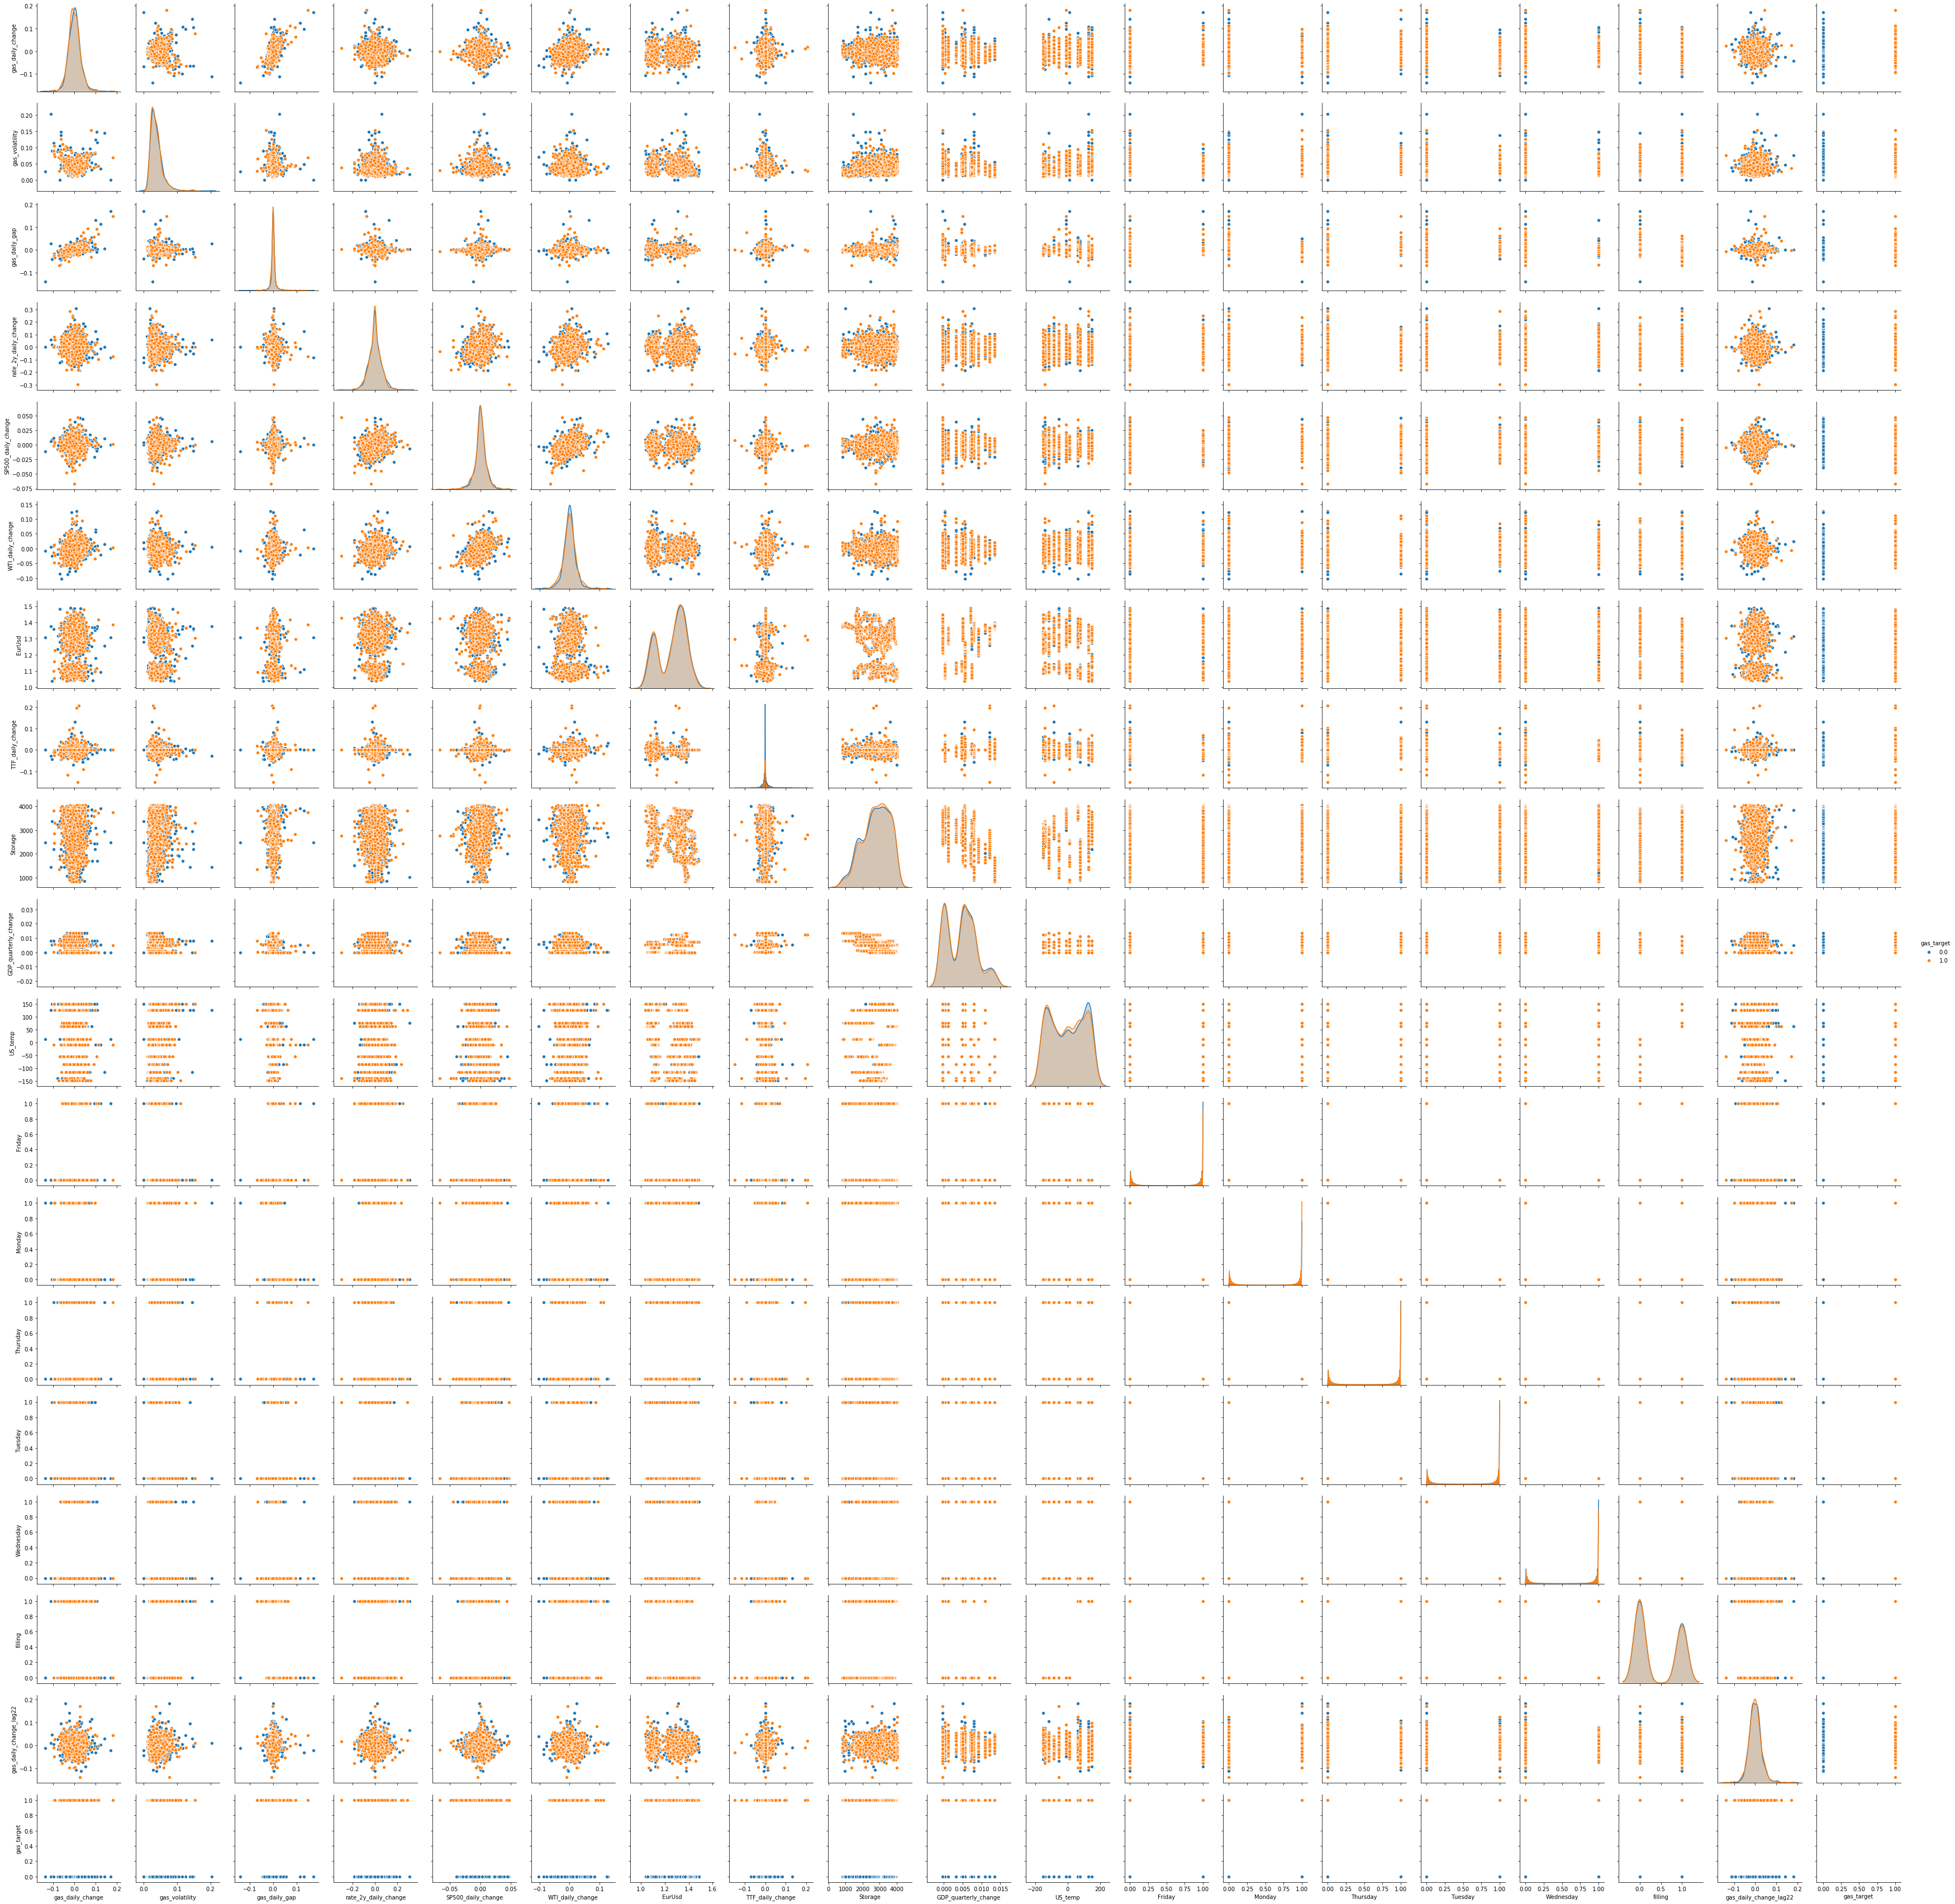

In [68]:
sns.pairplot(pd.concat([X_train, y_train], axis=1, sort=False), hue="gas_target")
plt.show()

Balance of the classes

In [89]:
y_train.value_counts()

0.0    900
1.0    877
Name: gas_target, dtype: int64

In [90]:
# preparing steps for the pipeline
steps = [('polynomial', PolynomialFeatures(2,include_bias=False)),
         ('Yeo-Johnson', PowerTransformer())]

In [91]:
pipeline = Pipeline(steps)

In [92]:
X_train_transf = pd.DataFrame(pipeline.fit_transform(X_train), index = X_train.index)
X_train_transf.head()

C:\Users\PC\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:2863: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


,0,1,2,3,4,5,6,7,8,9,...,179,180,181,182,183,184,185,186,187,188
Date,,,,,,,,,,,,,,,,,,,,,
2017-03-03,0.323156,-1.029768,0.281955,-0.010628,-0.023245,0.654460,-1.598356,0.056042,-0.627567,0.25524,...,-0.507551,0.0,-0.305841,0.005113,-0.507551,-0.306939,0.008518,1.187908,0.810766,-0.366414
2017-03-02,0.099735,0.195609,-0.309347,0.405238,-0.673465,-1.068065,-1.627143,-1.366894,-0.627567,0.25524,...,-0.507551,0.0,-0.305841,0.005113,-0.507551,-0.306939,0.008518,1.187908,-1.752002,1.160604
2017-03-01,0.351075,-0.344261,-0.190394,1.001360,1.388334,-0.131828,-1.616459,0.850987,-0.636188,0.25524,...,-0.507551,0.0,-0.305841,0.005113,1.970246,3.257972,-3.909918,1.187908,-2.355412,1.757451
2017-02-28,1.056530,0.864841,-0.131958,0.288216,-0.340693,-0.009784,-1.580118,-1.287378,-0.636188,0.25524,...,1.970246,0.0,3.269677,0.204901,-0.507551,-0.306939,0.008518,1.187908,0.167232,-1.046844
2017-02-27,0.894171,-1.026681,2.502009,1.242194,0.030187,0.076863,-1.585832,-2.180008,-0.636188,0.25524,...,-0.507551,0.0,-0.305841,0.005113,-0.507551,-0.306939,0.008518,1.187908,0.748069,-0.466859


In [93]:
X_train_transf.shape

(1777, 189)

In [95]:
display(X_train.describe()[1:3].round(2))
# display(X_train_transf_BC.describe()[1:3].round(2))
display(X_train_transf.describe()[1:3].round(2))

,gas_daily_change,gas_volatility,gas_daily_gap,rate_2y_daily_change,SP500_daily_change,WTI_daily_change,EurUsd,TTF_daily_change,Storage,GDP_quarterly_change,US_temp,Friday,Monday,Thursday,Tuesday,Wednesday,gas_daily_change_lag22
mean,0.00,0.04,0.00,0.00,0.00,0.00,1.26,-0.00,2795.58,0.0,-0.61,0.2,0.19,0.2,0.2,0.2,0.00
std,0.03,0.02,0.01,0.06,0.01,0.02,0.12,0.02,774.52,0.0,104.10,0.4,0.39,0.4,0.4,0.4,0.03


,0,1,2,3,4,5,6,7,8,9,...,179,180,181,182,183,184,185,186,187,188
mean,0.0,0.0,-0.0,0.0,-0.0,0.0,-0.0,-0.0,0.0,0.0,...,-0.0,0.0,0.0,0.0,-0.0,0.0,-0.0,-0.0,-0.0,-0.0
std,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [105]:
from sklearn.linear_model import LogisticRegression

selector = RFE(LogisticRegression(solver='lbfgs', max_iter=300, n_jobs=-1), 10, 2)

In [111]:
selector.fit(X_train_transf, y_train)
selected_columns = selector.get_support(indices=True)
selected_columns

array([  4,  14,  39,  49,  86, 119, 120, 140, 142, 159], dtype=int64)

In [110]:
selector.

RFE(estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                 fit_intercept=True, intercept_scaling=1,
                                 l1_ratio=None, max_iter=300,
                                 multi_class='warn', n_jobs=-1, penalty='l2',
                                 random_state=None, solver='lbfgs', tol=0.0001,
                                 verbose=0, warm_start=False),
    n_features_to_select=10, step=2, verbose=0)

In [113]:
X_train_transf.iloc[:, selected_columns]

,4,14,39,49,86,119,120,140,142,159
Date,,,,,,,,,,
2017-03-03,-0.023245,-0.507551,-0.034827,-0.506215,-0.032352,-0.507548,-0.507548,-0.507549,1.162996,1.112726
2017-03-02,-0.673465,-0.507551,-0.607613,-0.506215,-0.565570,-0.507548,-0.507548,-0.507549,1.162996,1.112726
2017-03-01,1.388334,-0.507551,0.975530,-0.506215,1.116234,-0.507548,1.954331,-0.507549,1.162558,1.112726
2017-02-28,-0.340693,1.970246,-0.375136,2.045301,-0.294094,1.955042,-0.507548,1.968911,1.162558,1.240442
2017-02-27,0.030187,-0.507551,-0.005329,-0.506215,0.011702,-0.507548,-0.507548,-0.507549,1.162558,1.240442
...,...,...,...,...,...,...,...,...,...,...
2010-02-10,-0.305318,-0.507551,-0.210407,-0.506215,-0.320795,-0.507548,1.977312,-0.507549,1.165656,1.240442
2010-02-09,1.318324,1.970246,1.196457,2.028877,1.419068,1.977390,-0.507548,1.969224,1.165656,1.240442
2010-02-08,-0.973410,-0.507551,-1.214782,-0.506215,-1.029202,-0.507548,-0.507548,-0.507549,1.165656,1.240442


In [143]:
steps = [('polynomial', PolynomialFeatures(2,include_bias=False)),
         ('Yeo-Johnson', PowerTransformer()),
         ('RFE', RFE(LogisticRegression(solver='lbfgs', max_iter=300, n_jobs=-1), 50, 2)),
         ('PCA', PCA(n_components=12))]

In [144]:
# pipeline = Pipeline(steps)

# params = {}
# params['LogReg__C'] = [0.1, 0.5, 1]

# CV = GridSearchCV(pipeline, params, n_jobs=-1, verbose=1)

# CV.fit(X_train, y_train)

In [145]:
pipeline = Pipeline(steps)
X_train_transf = pd.DataFrame(pipeline.fit_transform(X_train, y_train), index = X_train.index)
X_train_transf.head()

C:\Users\PC\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:2863: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


,0,1,2,3,4,5,6,7,8,9,10,11
Date,,,,,,,,,,,,
2017-03-03,-0.824908,0.115222,0.211846,1.387072,1.847125,0.619835,-0.072932,-1.644168,-0.883617,-0.675547,0.743118,0.184580
2017-03-02,-1.915660,0.962615,0.156968,2.211340,-0.733951,0.922404,-1.409277,0.480426,-1.226202,-1.312054,2.774998,0.049438
2017-03-01,-2.086814,1.221761,3.269093,1.240257,3.631233,-1.993421,1.237638,1.024225,-0.172909,-0.343663,-0.719471,-0.263236
2017-02-28,2.944903,4.060039,-1.014221,2.456437,0.682705,-0.887294,-1.668826,0.086028,-1.186832,1.394433,0.673735,0.741803
2017-02-27,-1.539864,1.562116,2.496682,1.594134,1.830422,2.291549,-2.504454,-3.575381,-1.500210,3.211115,0.046016,-1.930368


In [146]:
# Printing some statistics to evaluate the models performance
def evaluate(y_true, y_pred):
      
    print ('''Accuracy:
    ''',
    accuracy_score(y_true,y_pred)*100)
    
    c_m = confusion_matrix(y_true, y_pred)
    ax = sns.heatmap(c_m, annot=True)
    bottom, top = ax.get_ylim()
    ax.set_ylim(bottom + 0.5, top - 0.5)
    plt.show()
    
    print('''
    --------------------------------------------------
    ''')

In [151]:
model = LogisticRegression()
model.fit(X_train_transf, y_train)

C:\Users\PC\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

Accuracy:
     53.29206527855938


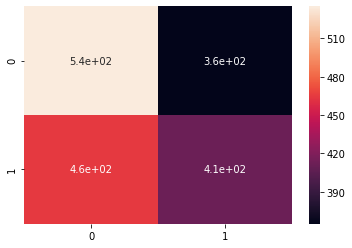


    --------------------------------------------------
    


In [155]:
y_pred = model.predict(X_train_transf)
evaluate(y_train, y_pred)

In [157]:
X_test_transf = pd.DataFrame(pipeline.transform(X_test), index = X_test.index)
X_test_transf

,0,1,2,3,4,5,6,7,8,9,10,11
Date,,,,,,,,,,,,
2018-09-07,1.209084,-3.080122,1.598777,-0.874095,1.893911,1.494749,-0.118046,-1.511272,-0.212527,-1.607466,0.171448,0.192572
2018-09-06,0.606877,-2.993134,0.574075,-0.476135,1.019161,1.262496,-0.074709,-1.333894,-0.430313,-2.246592,0.831473,-0.154426
2018-09-05,0.154862,-3.150606,0.939292,-0.608443,2.071412,-0.090003,0.348936,0.469473,0.157936,-0.291967,-0.225160,-0.356557
2018-09-04,4.761939,0.354128,-0.351543,0.381450,0.048543,0.251260,-0.107340,0.953597,0.468754,-0.673306,-1.022797,0.729757
2018-08-31,1.005259,-3.092780,0.860358,-0.532197,0.810854,1.051399,0.191797,-0.885081,-0.202268,0.060691,1.049542,-0.675361
...,...,...,...,...,...,...,...,...,...,...,...,...
2017-03-10,-0.902771,0.181247,0.069986,1.552174,1.537626,0.213147,0.211548,-1.725766,-0.946639,-0.502352,0.557650,0.338357
2017-03-09,-1.723032,0.671391,0.156623,2.050410,-0.394517,-0.463757,-1.096808,-1.220681,-1.453232,-1.357934,2.087191,0.279149
2017-03-08,-2.546654,1.030660,0.982837,1.387853,3.445142,-2.126450,-0.906014,2.364027,-0.485463,1.458039,0.376602,0.168246


LogisticRegression
Accuracy:
     46.981627296587924


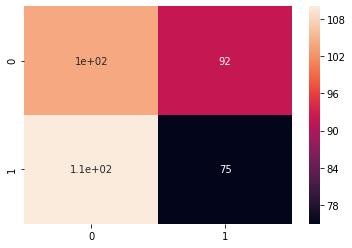


    --------------------------------------------------
    


In [158]:
    y_pred = model.predict(X_test_transf)
    
    print(model.__class__.__name__)
    evaluate(y_test, y_pred)

In [ ]:
# pipeline = Pipeline(
#                     [('count_vect', CountVectorizer()),
#                     ('LogReg', LogisticRegression())
# ])

# params = {}
# params['count_vect__ngram_range'] = [(1,1), (1,2), (1,3)]
# params['count_vect__max_df'] = [0.5, 0.6, 0.7, 0.8]
# params['count_vect__min_df'] = [0.005, 0.01, 0.02, 0.04]
# params['LogReg__C'] = [0.1, 0.5, 1]

# CV = GridSearchCV(pipeline, params, n_jobs=-1, verbose=1)

# CV.fit(X_train, y_train)